In [163]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

In [164]:
data=pd.read_excel('Scoring.xlsx')

In [165]:
data.head()

,gender,year1,povtorny_client,summa,sroc,type_zaloga,obrozovania,type_bizines,sel_cridit,prosrochki_za_sicl,yedino_prosrochli,Year_,Unnamed: 12
0,Муж,29.07.1977,Новый клиент,25000.0,24,Смешанное обеспечение,Сред.спец.образ-ние,4. Савдо / Торговля,Строительство жилья,0,0,46,1977
1,Жен,02.01.1974,Старый клиент,50000.0,36,Смешанное обеспечение,Высшее образование,1. Карзи истеъмоли/Потребительский кредит,Ремонт жилья,0,0,49,1974
2,Жен,16.10.1975,Старый клиент,20000.0,12,Ювелирные изделия,Высшее образование,4. Савдо / Торговля,Потребительские цели,0,0,48,1975
3,Жен,16.10.1975,Старый клиент,18000.0,12,Ювелирные изделия,Высшее образование,4. Савдо / Торговля,Потребительские цели,0,0,48,1975
4,Жен,16.10.1975,Старый клиент,15000.0,12,Ювелирные изделия,Высшее образование,4. Савдо / Торговля,Потребительские цели,0,0,48,1975


In [166]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13855 entries, 0 to 13854
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              13855 non-null  object 
 1   year1               13855 non-null  object 
 2   povtorny_client     13855 non-null  object 
 3   summa               13855 non-null  float64
 4   sroc                13855 non-null  int64  
 5   type_zaloga         13855 non-null  object 
 6   obrozovania         13855 non-null  object 
 7   type_bizines        13855 non-null  object 
 8   sel_cridit          13855 non-null  object 
 9   prosrochki_za_sicl  13855 non-null  int64  
 10  yedino_prosrochli   13855 non-null  int64  
 11  Year_               13855 non-null  int64  
 12  Unnamed: 12         13855 non-null  int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 1.4+ MB


In [167]:
data.columns

Index(['gender', 'year1', 'povtorny_client', 'summa', 'sroc', 'type_zaloga',
       'obrozovania', 'type_bizines', 'sel_cridit', 'prosrochki_za_sicl',
       'yedino_prosrochli', 'Year_', 'Unnamed: 12'],
      dtype='object')

In [168]:
data['summa'] = data['summa'].astype(np.int64)

In [169]:
data.loc[data['summa'] < 5000, 'summa_code']=0
data.loc[data['summa'] >= 5000, 'summa_code']=1

In [170]:
data.gender.value_counts()

Муж    8239
Жен    5616
Name: gender, dtype: int64

In [171]:
data.loc[data['gender']=='Муж', 'gender_code']=0
data.loc[data['gender']=='Жен', 'gender_code']=1

In [172]:
data.povtorny_client.value_counts()

Старый клиент    10495
Новый клиент      3360
Name: povtorny_client, dtype: int64

In [173]:
data.loc[data['povtorny_client']=='Старый клиент', 'povtorny_client_code']=0
data.loc[data['povtorny_client']=='Новый клиент', 'povtorny_client_code']=1

In [174]:
data.type_zaloga.value_counts()

Поручительство           8675
Не обеспеченный          4130
Смешанное обеспечение     634
Движимое имущество        205
Ювелирные изделия         156
Депозит                    37
Недвижимость               18
Name: type_zaloga, dtype: int64

In [175]:
data.loc[data['type_zaloga']=='Поручительство', 'type_zaloga_code']=0
data.loc[data['type_zaloga']=='Не обеспеченный', 'type_zaloga_code']=1
data.loc[data['type_zaloga']=='Смешанное обеспечение', 'type_zaloga_code']=2
data.loc[data['type_zaloga']=='Движимое имущество', 'type_zaloga_code']=3
data.loc[data['type_zaloga']=='Ювелирные изделия', 'type_zaloga_code']=4
data.loc[data['type_zaloga']=='Депозит', 'type_zaloga_code']=5
data.loc[data['type_zaloga']=='Недвижимость', 'type_zaloga_code']=6

In [176]:
data.obrozovania.value_counts()

Среднее образование    7420
Высшее образование     5185
Сред.спец.образ-ние    1120
Непол Сред.образ        119
Аспирантура               6
Начал образование         5
Name: obrozovania, dtype: int64

In [177]:
data.loc[data['obrozovania']=='Среднее образование', 'obrozovania_code']=0
data.loc[data['obrozovania']=='Высшее образование', 'obrozovania_code']=1
data.loc[data['obrozovania']=='Сред.спец.образ-ние', 'obrozovania_code']=2
data.loc[data['obrozovania']=='Непол Сред.образ', 'obrozovania_code']=3
data.loc[data['obrozovania']=='Аспирантура', 'obrozovania_code']=4
data.loc[data['obrozovania']=='Начал образование', 'obrozovania_code']=5

In [178]:
data.type_bizines.value_counts()

1. Карзи истеъмоли/Потребительский кредит    8313
3. Хизматрасони/Услуги                       4064
4. Савдо / Торговля                          1343
2. Истехсолот/Производство                    135
Name: type_bizines, dtype: int64

In [179]:
data.loc[data['type_bizines']=='Карзи истеъмоли/Потребительский кредит', 'type_bizines_code']=0
data.loc[data['type_bizines']=='Хизматрасони/Услуги', 'type_bizines_code']=1
data.loc[data['type_bizines']=='Савдо / Торговля', 'type_bizines_code']=2
data.loc[data['type_bizines']=='Истехсолот/Производство', 'type_bizines_code']=3

In [180]:
data.sel_cridit.value_counts()

Потребительские цели                 12967
Оборотный капитал                      679
Основные средства                      193
Покупка жилья                            6
Баланд бардоштани сам. эн. манзил        6
Строительство жилья                      3
Ремонт жилья                             1
Name: sel_cridit, dtype: int64

In [181]:
data.loc[data['sel_cridit']=='Потребительские цели', 'sel_cridit_code']=0
data.loc[data['sel_cridit']=='Оборотный капитал', 'sel_cridit_code']=1
data.loc[data['sel_cridit']=='Основные средства', 'sel_cridit_code']=2
data.loc[data['sel_cridit']=='Покупка жилья', 'sel_cridit_code']=3
data.loc[data['sel_cridit']=='Баланд бардоштани сам. эн. манзил', 'sel_cridit_code']=4
data.loc[data['sel_cridit']=='Строительство жилья', 'sel_cridit_code']=5
data.loc[data['sel_cridit']=='Ремонт жилья', 'sel_cridit_code']=6

In [182]:
data.columns

Index(['gender', 'year1', 'povtorny_client', 'summa', 'sroc', 'type_zaloga',
       'obrozovania', 'type_bizines', 'sel_cridit', 'prosrochki_za_sicl',
       'yedino_prosrochli', 'Year_', 'Unnamed: 12', 'summa_code',
       'gender_code', 'povtorny_client_code', 'type_zaloga_code',
       'obrozovania_code', 'type_bizines_code', 'sel_cridit_code'],
      dtype='object')

In [183]:
data = data[['summa', 'sroc', 'prosrochki_za_sicl', 'yedino_prosrochli', 'Year_', 'gender_code',
       'povtorny_client_code', 'type_zaloga_code', 'obrozovania_code',
       'sel_cridit_code', 'summa_code']]

In [184]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13855 entries, 0 to 13854
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   summa                 13855 non-null  int64  
 1   sroc                  13855 non-null  int64  
 2   prosrochki_za_sicl    13855 non-null  int64  
 3   yedino_prosrochli     13855 non-null  int64  
 4   Year_                 13855 non-null  int64  
 5   gender_code           13855 non-null  float64
 6   povtorny_client_code  13855 non-null  float64
 7   type_zaloga_code      13855 non-null  float64
 8   obrozovania_code      13855 non-null  float64
 9   sel_cridit_code       13855 non-null  float64
 10  summa_code            13855 non-null  float64
dtypes: float64(6), int64(5)
memory usage: 1.2 MB


<Axes: >

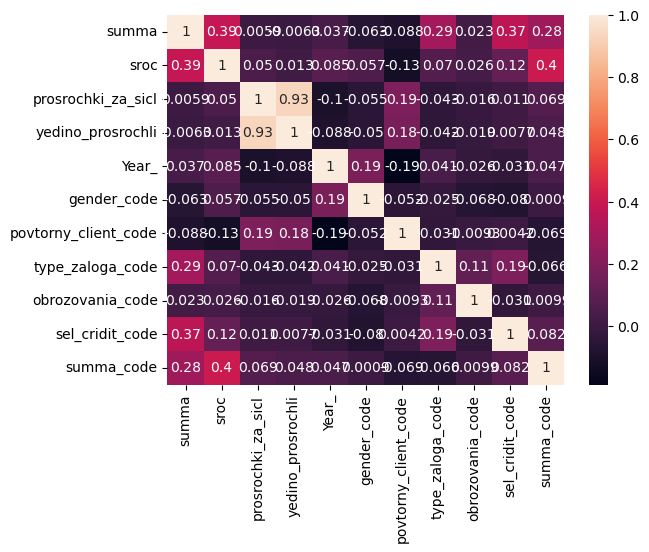

In [185]:
sns.heatmap(data.corr(), annot=True)

In [304]:
X=data.drop(['prosrochki_za_sicl', 'yedino_prosrochli'],axis=1)
y=data.summa_code

In [305]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4,random_state=40)

In [306]:
X_train

,summa,sroc,Year_,gender_code,povtorny_client_code,type_zaloga_code,obrozovania_code,sel_cridit_code,summa_code
9022,15000,12,31,0.0,0.0,0.0,0.0,0.0,1.0
7752,6000,18,65,0.0,0.0,0.0,0.0,0.0,1.0
6131,3000,12,40,0.0,0.0,1.0,0.0,0.0,0.0
9588,3500,12,53,0.0,1.0,1.0,1.0,0.0,0.0
3868,5000,12,35,0.0,0.0,1.0,2.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
11532,5000,12,31,0.0,1.0,1.0,1.0,0.0,1.0
5426,7000,18,49,1.0,0.0,1.0,0.0,0.0,1.0
7608,3000,12,42,1.0,0.0,1.0,0.0,0.0,0.0
11256,5000,12,29,0.0,1.0,0.0,1.0,0.0,1.0


In [307]:
logreg=LogisticRegression()

In [308]:
logreg.fit(X_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [309]:
y_pred = logreg.predict(X_test)

In [310]:
y_pred

array([1., 1., 0., ..., 0., 1., 0.])

In [311]:
LogRegAccur = metrics.accuracy_score(y_test,y_pred)

In [312]:
cnf_matrix=metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

array([[1289,   31],
       [  34, 4188]], dtype=int64)

In [313]:
pd.crosstab(y_test,y_pred)

col_0,0.0,1.0
summa_code,,
0.0,1289,31
1.0,34,4188


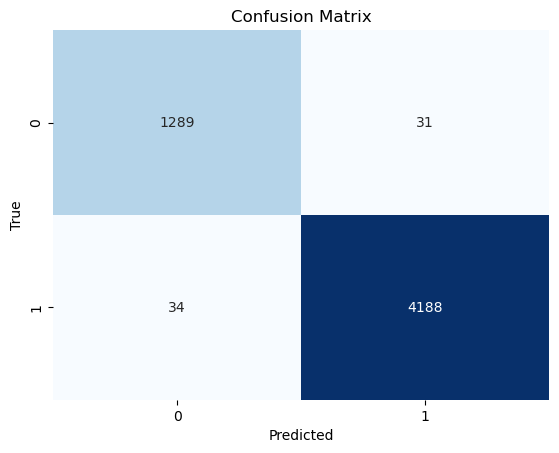

In [314]:
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [315]:
metrics.roc_auc_score(y_test, y_pred)

0.9842310480455909

In [316]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score 

In [317]:
# Gradient Boosting Regression Model   
gbr = GradientBoostingRegressor()     # Creating an object of Gradient Boosting Regressor class 
gbr.fit(X_train, y_train) 
#calculating the metrics for the model  
y_pred = gbr.predict(X_test) 
mse = mean_squared_error(y_test, y_pred) 
r2 = r2_score(y_test, y_pred)  
print("Mean Squared Error:", mse)  
print("R-Squared:", r2)

Mean Squared Error: 1.2825402682313048e-10
R-Squared: 0.9999999992931751


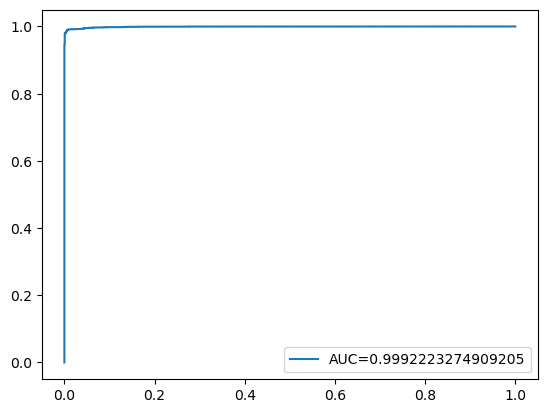

In [318]:
#plot ROC curve
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()

In [319]:
X_test.head()

,summa,sroc,Year_,gender_code,povtorny_client_code,type_zaloga_code,obrozovania_code,sel_cridit_code,summa_code
10916,6000,18,37,1.0,0.0,0.0,0.0,0.0,1.0
6644,5000,12,51,1.0,0.0,0.0,1.0,0.0,1.0
3972,5000,18,49,0.0,0.0,1.0,2.0,0.0,1.0
4795,5000,18,42,1.0,1.0,0.0,0.0,0.0,1.0
1710,1000,6,41,1.0,0.0,0.0,0.0,0.0,0.0


In [322]:
print(gbr.predict([[6000, 12, 40, 1, 0, 1, 2, 3, 0]]))

[0.55066493]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


In [323]:
import pickle

In [324]:
pickle_out=open("Scoring_v.1.0.pkl", "wb")

In [325]:
pickle.dump(gbr, pickle_out)

In [326]:
pickle_out.close()